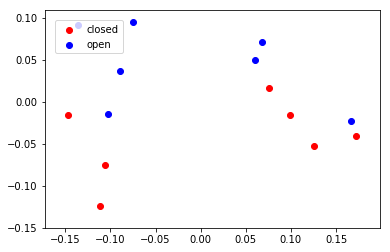

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pickle as pickle
import gudhi as gd
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image
from sklearn import manifold
import seaborn as sns

#Here is the list of files to import
files_list = [
'data/proteins/1anf.corr_1.txt',
'data/proteins/1ez9.corr_1.txt',
'data/proteins/1fqa.corr_2.txt',
'data/proteins/1fqb.corr_3.txt',
'data/proteins/1fqc.corr_2.txt',
'data/proteins/1fqd.corr_3.txt',
'data/proteins/1jw4.corr_4.txt',
'data/proteins/1jw5.corr_5.txt',
'data/proteins/1lls.corr_6.txt',
'data/proteins/1mpd.corr_4.txt',
'data/proteins/1omp.corr_7.txt',
'data/proteins/3hpi.corr_5.txt',
'data/proteins/3mbp.corr_6.txt',
'data/proteins/4mbp.corr_7.txt']
#Read the files:
corr_list = [pd.read_csv(u , header=None,delim_whitespace=True) for u in files_list]
#And change correlation matrix do a distance matrix:
dist_list = [1- np.abs(c) for c in corr_list]

#Compute persistence in dimension 1 for all the files. Visualize the persistence diagrams for some of them
persistence = []
for i in range(0,len(dist_list)):
	rips_complex = gd.RipsComplex(distance_matrix=dist_list[i].values,max_edge_length=0.8)
	simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
	simplex_tree.persistence()
	persistence.append( simplex_tree.persistence_intervals_in_dimension(0) )

#And compute all-to-all bottleneck distances. Note that this part will take a few seconds:
dist_mat = []
for i in range(0,len(persistence)):
	row = []
	for j in range(0,len(persistence)):
		row.append( gd.bottleneck_distance(persistence[i], persistence[j]) )
	dist_mat.append(row)

#We will now use a dimension reduction method to
#visualize a configuration in  R^2  which almost
#matches with the matrix of bottleneck distances.
#For that purpose we will apply a Multidimensional
#Scaling method implemented in the scikit-learn library.

mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9,dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(dist_mat).embedding_

plt.scatter(pos[0:7,0], pos[0:7, 1], color='red', label="closed")
plt.scatter(pos[7:len(dist_mat),0], pos[7:len(dist_mat), 1], color='blue', label="open")
plt.legend( loc=2, borderaxespad=1)
plt.show()